The goal here is to evaluate the values and compute the number of bits that are being modified by adversarial training.

In [64]:
import numpy as np
from matplotlib import pyplot as plt

In [65]:
orig_weights = np.load('original_weights.npy')
modified_weights = np.load('modified_weights.npy')

In [66]:
def compute_minAndMax(list_arrays):
    '''
    Function to find the smallest and largest elements 
    on a list of numpy arrays
    '''
    min_val = np.inf
    max_val = -np.inf
    for arr in list_arrays:
        if arr.min() < min_val:
            min_val = arr.min()
        if arr.max() > max_val:
            max_val = arr.max()
    return min_val, max_val

In [67]:
def compute_scalingFunction(list_weightArrays, N) :
    """
    returns a function which scales the value to range 0-N,
    and is given by :
                N * (x - min)
        f(x) = ------------
                max - min
    """
    min_val, max_val = compute_minAndMax(list_weightArrays)
    print(min_val, max_val)
    factor = N / (max_val - min_val)
    return lambda x : N * (x - min_val)/(max_val - min_val)

In [68]:
def scale_weights(list_weightArrays, scale_func, N):
    """
    scale the weight values so that they are integers
    which can be manipulated with bitwise operators
    """
    list_scaledWeightArrays = []
    for arr in list_weightArrays:
        scaledArray = scale_func(arr)
        list_scaledWeightArrays.append(scaledArray.astype(int))
    return list_scaledWeightArrays

In [69]:
def compute_bitErrorRate(list_origWeights, list_modifiedWeights, N):
    '''
    scales the values to range 0-N, then computes the xor for each pair of values
    '''
    # We need to consider both the original weights as well as the modified 
    # weights while finding the minimum and maximum element, so the two arrays 
    # are concatenated before computing the scaling function
    list_weightArrays = list_origWeights + list_modifiedWeights
    scale_func = compute_scalingFunction(list_weightArrays, N)
    scaled_origWeights = scale_weights(list_origWeights, scale_func, N)
    scaled_modifiedWeights = scale_weights(list_modifiedWeights, scale_func, N)
    list_bitErrorRates = []
    for orig_arr, modified_arr in zip(scaled_origWeights, scaled_modifiedWeights):
        error_arr = orig_arr ^ modified_arr
        list_bitErrorRates.append(error_arr)
    return list_bitErrorRates

In [70]:
l = compute_bitErrorRate(orig_weights, modified_weights, 255)
compute_minAndMax(l)

-2.0573716 1.2827647


(0, 255)

In [75]:
def visualize(list_arrays):
    flattenedArray = np.array([])
    for arr in list_arrays:
        flattenedArray = np.append(flattenedArray, np.reshape(arr, (-1,)))
    print('histogram of xor values for all weight values')
    h = plt.hist(flattenedArray, 20)
    plt.show()
    print('Most of the values are 0, so I plot only the non-zero values in the'
          + ' next graph')
    h = plt.hist(flattenedArray[flattenedArray > 0], 20)
    plt.show()
    print('layer-wise distribution of the xor values' +
            'with only non-zero values considered')
    for i,arr in enumerate(list_arrays):
        arr = np.reshape(arr, (-1,))
        print('Layer no. ', i+1)
        #h = plt.hist(arr, 20)
        #plt.show()
        h = plt.hist(arr[arr > 0], 20)
        plt.show()

histogram of xor values for all weight values


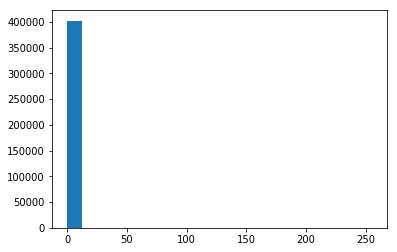

Most of the values are 0, so I plot only the non-zero values in the next graph


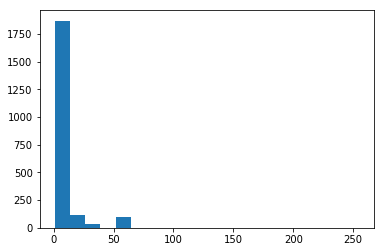

layer-wise distribution of the xor valueswith only non-zero values considered
Layer no.  1


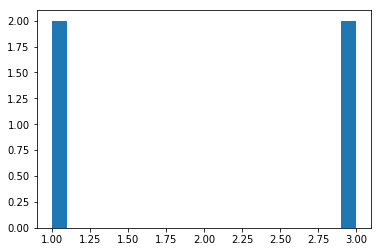

Layer no.  2


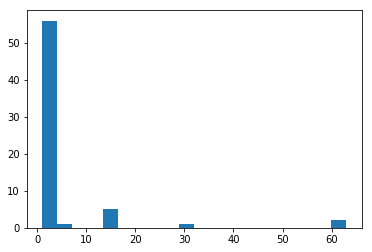

Layer no.  3


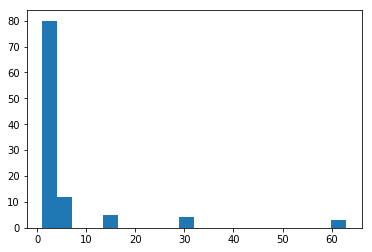

Layer no.  4


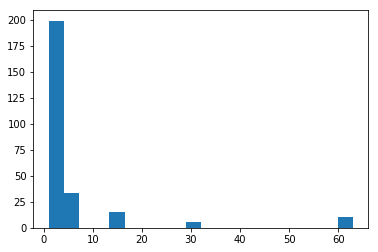

Layer no.  5


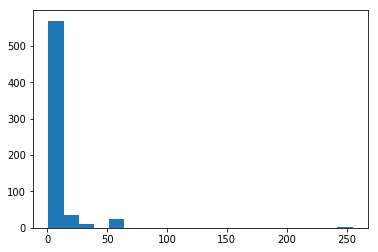

Layer no.  6


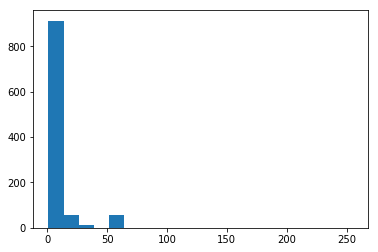

Layer no.  7


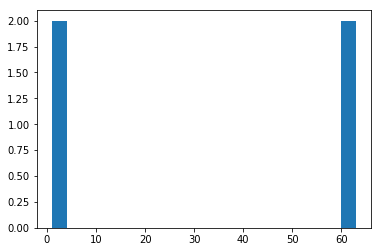

In [76]:
visualize(l)